In [56]:
import matplotlib.pyplot as plt
import altair 
import pandas as pd

In [57]:
data = pd.read_csv("/Users/deekshitamadhalam/Documents/TechChallenge_Data.xlsx - Sheet1.csv")
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
del data["Month_num"]
del data["Year"]
data.rename(columns={"Month": "Date"}, inplace=True)
data


,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes)
0,1985-01-01,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235
1,1985-01-01,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000
2,1985-01-01,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000
3,1985-01-01,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248
4,1985-01-01,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1989-07-01,Adelaide,Rome,Italy,0,0.000,0.000,48,0.000,0.000,48,0.000,0.000
9995,1989-07-01,Adelaide,San Francisco,USA,11,0.000,0.000,12,0.000,0.000,23,0.000,0.000
9996,1989-07-01,Adelaide,Singapore,Singapore,4340,139.170,3.074,3414,363.929,3.930,7754,503.099,7.004
9997,1989-07-01,Adelaide,Tokyo,Japan,422,2.690,0.000,98,2.914,0.096,520,5.604,0.096


## 1a

In [58]:
#Adds all types of traffic, to compare 
data["Total_Traffic"] = data["Passengers_Total"] + data["Freight_Total_(tonnes)"] + data["Mail_Total_(tonnes)"]

In [59]:

#Most Trafficked Route (Only based on Passenger)
max_row = data.sort_values(by='Passengers_Total', ascending=False).head(3)
max_row

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Total_Traffic
6597,1988-01-01,Sydney,Auckland,New Zealand,36406,771.437,1.423,33608,1100.061,34.557,70014,1871.498,35.980,71921.478
8361,1988-10-01,Sydney,Auckland,New Zealand,34152,1189.784,11.592,35787,1711.480,68.053,69939,2901.264,79.645,72919.909
7768,1988-07-01,Sydney,Auckland,New Zealand,35753,1094.892,14.641,33876,1576.287,73.566,69629,2671.179,88.207,72388.386


In [60]:
#Most Trafficked Route (Only based on Passenger)
zero_rows = data[data['Passengers_Total'] == 0]
zero_rows.sort_values(by="Total_Traffic", ascending = True)

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Total_Traffic
7595,1988-06-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
7921,1988-08-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
7789,1988-07-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
7726,1988-07-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
8183,1988-09-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
7531,1988-06-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
8320,1988-10-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
8383,1988-10-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
7985,1988-08-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000
8119,1988-09-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.000


In [61]:
len(zero_rows)

44

In [62]:
#Most Trafficked Route
max_all_traffic = data.sort_values(by='Total_Traffic', ascending=False).head(3)
max_all_traffic

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Total_Traffic
8361,1988-10-01,Sydney,Auckland,New Zealand,34152,1189.784,11.592,35787,1711.480,68.053,69939,2901.264,79.645,72919.909
7768,1988-07-01,Sydney,Auckland,New Zealand,35753,1094.892,14.641,33876,1576.287,73.566,69629,2671.179,88.207,72388.386
8160,1988-09-01,Sydney,Auckland,New Zealand,30729,1085.470,14.178,38475,1664.378,65.122,69204,2749.848,79.300,72033.148


In [63]:
#Least Trafficked Route
zero_rows_total = data[data['Total_Traffic'] == 0]
zero_rows_total

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Total_Traffic
7531,1988-06-01,Melbourne,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
7595,1988-06-01,Sydney,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
7726,1988-07-01,Melbourne,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
7789,1988-07-01,Sydney,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
7921,1988-08-01,Melbourne,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
7985,1988-08-01,Sydney,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
8119,1988-09-01,Melbourne,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
8183,1988-09-01,Sydney,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
8320,1988-10-01,Melbourne,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
8383,1988-10-01,Sydney,Nauru,Nauru,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [64]:
len(zero_rows_total)

10

## 1b

In [71]:
# Group passengers by year
data['Year'] = data['Date'].dt.year
yearly_passengers = data.groupby('Year')['Passengers_Total'].sum()

yearly_passengers


Year
1985    5200373
1986    5818437
1987    6714432
1988    7766782
1989    3795339
Name: Passengers_Total, dtype: int64

In [77]:
#Group by number of passangers in each port
foreign_port_traffic = data.groupby('ForeignPort')['Passengers_Total'].sum()

#Top ports
foreign_port_traffic.sort_values(ascending=False)


ForeignPort
Auckland        5246876
Singapore       4130761
Hong Kong       2217453
Christchurch    1723832
Tokyo           1682712
                 ...   
Denver              329
Ljubljana           194
Malta               165
Dunedin              40
Chicago              31
Name: Passengers_Total, Length: 66, dtype: int64

In [78]:
#Least Popular Port
foreign_port_traffic.sort_values(ascending=True)

ForeignPort
Chicago              31
Dunedin              40
Malta               165
Ljubljana           194
Denver              329
                 ...   
Tokyo           1682712
Christchurch    1723832
Hong Kong       2217453
Singapore       4130761
Auckland        5246876
Name: Passengers_Total, Length: 66, dtype: int64

In [87]:
yearly_mail = data.groupby('Year')['Mail_Total_(tonnes)'].sum()
yearly_mail

Year
1985     4533.865
1986     4950.820
1987     5979.232
1988    11336.806
1989     7108.723
Name: Mail_Total_(tonnes), dtype: float64

In [88]:
yearly_freight = data.groupby('Year')['Freight_Total_(tonnes)'].sum()
yearly_freight

Year
1985    231001.517
1986    248738.658
1987    287930.749
1988    308883.651
1989    162312.770
Name: Freight_Total_(tonnes), dtype: float64

## 1c

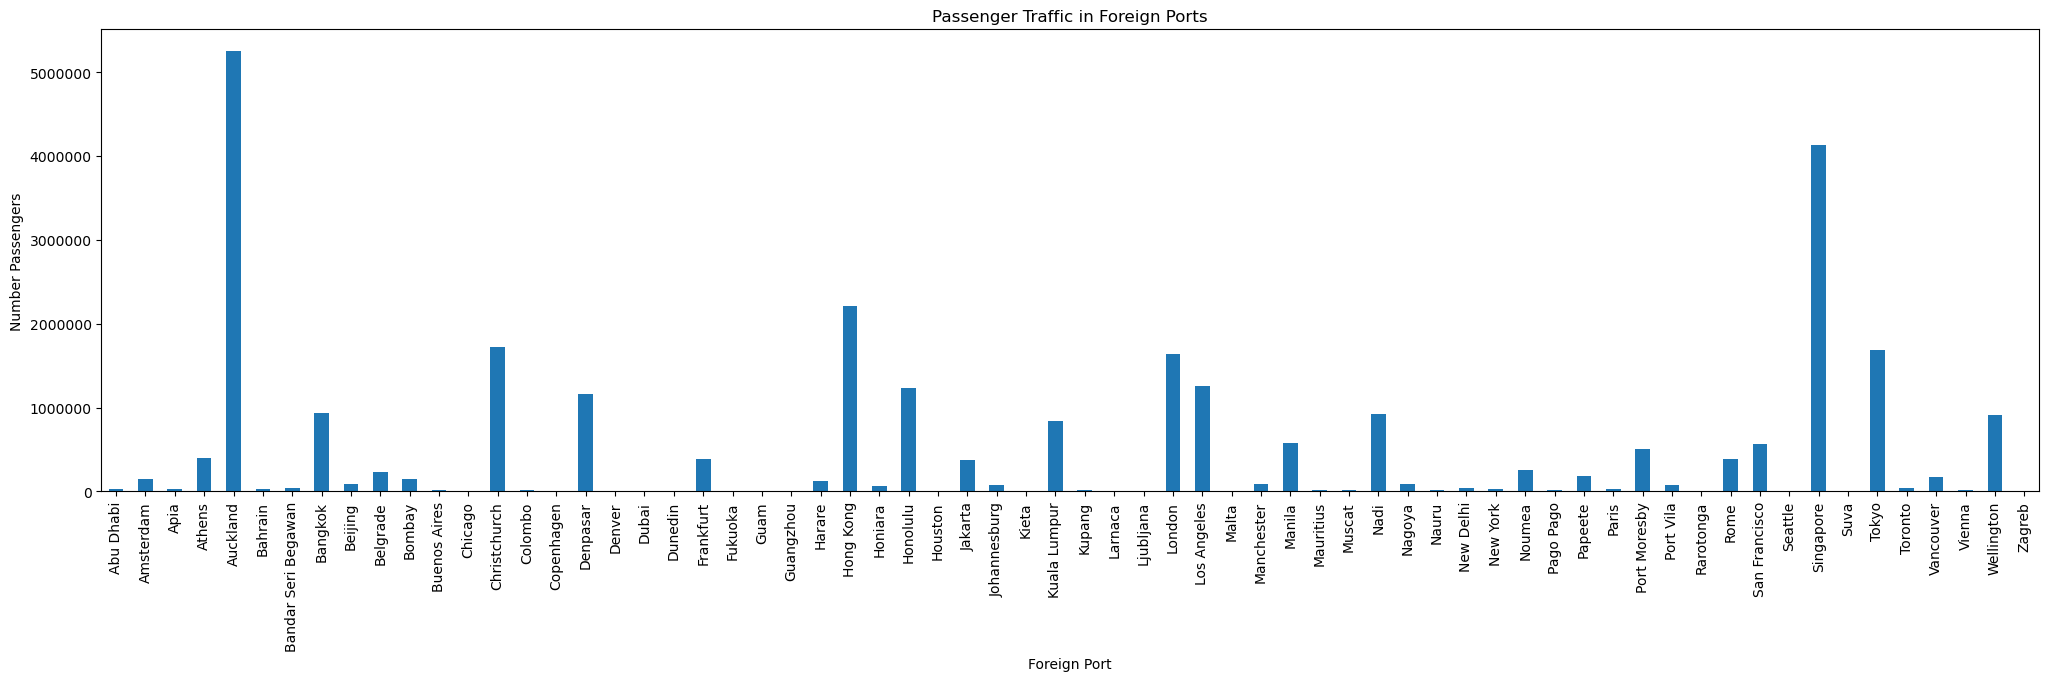

In [94]:
plt.figure(figsize=(25,6))
foreign_port_traffic.plot(kind='bar')
plt.title("Passenger Traffic in Foreign Ports")
plt.ylabel("Number Passengers")
plt.xlabel("Foreign Port")
plt.ticklabel_format(style='plain', axis='y')

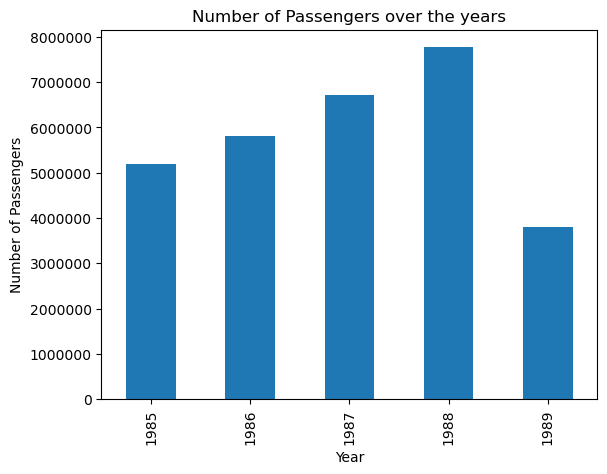

In [97]:
yearly_passengers.plot(kind='bar')
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers over the years")
plt.ticklabel_format(style='plain', axis='y')

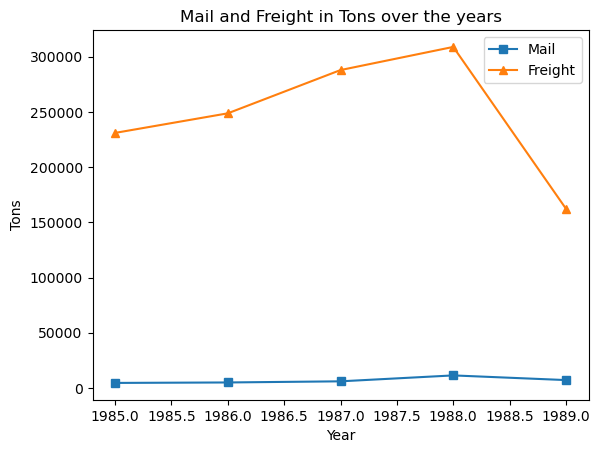

In [110]:
plt.plot(yearly_mail, marker='s', label='Mail')
plt.plot(yearly_freight, marker='^', label='Freight')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel("Tons")
plt.title("Mail and Freight in Tons over the years")
plt.legend()

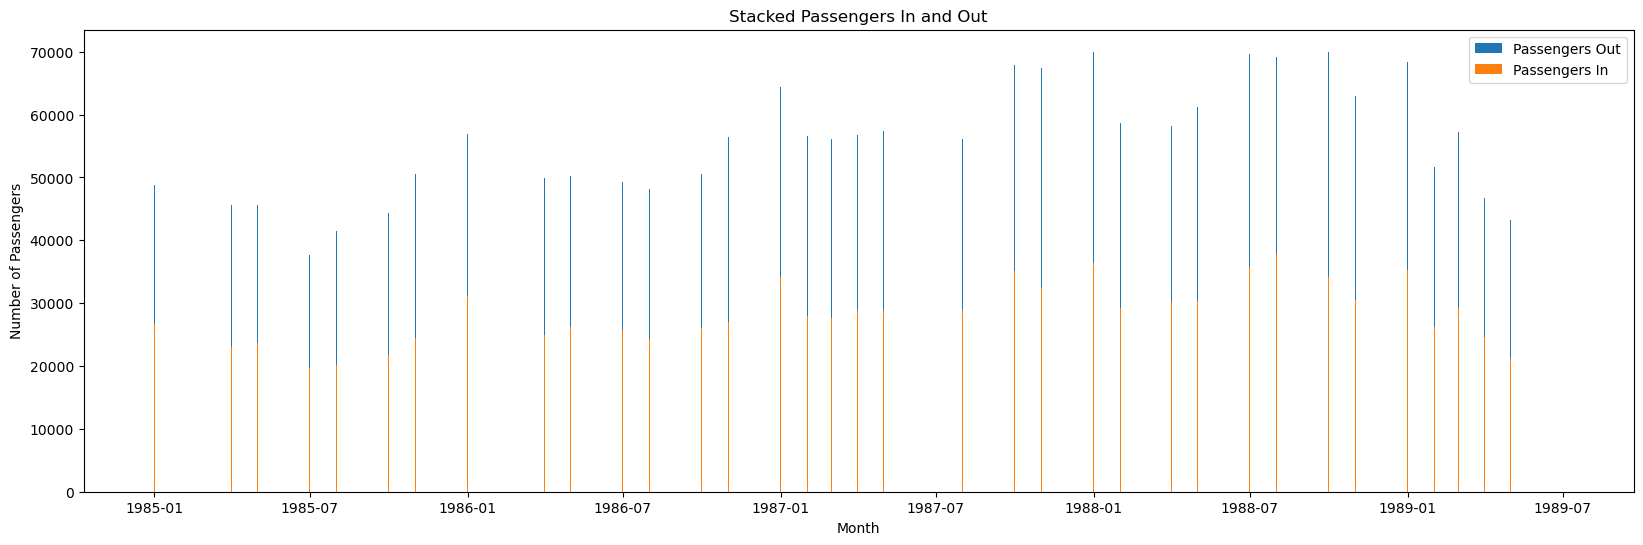

In [136]:
plt.figure(figsize=(20,6))

plt.bar(data['Date'], data['Passengers_Out'], bottom=data['Passengers_In'], label='Passengers Out')
plt.bar(data['Date'], data['Passengers_In'], label='Passengers In')

# Titles and labels
plt.title('Stacked Passengers In and Out')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()